In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mline

In [16]:
# Define the objective, its gradient, and the solvers

D = np.diag([2,50])

def f(x):
    return 1/2*np.linalg.norm(D @ x)**2

def df(x):
    return D @ D @ x

def gd(df, x0, beta, T):
    xhist=[x0]
    for t in np.arange(1,T+1):
        prevx = xhist[-1]
        stepsize = 1/beta
        xhist.append(prevx - stepsize * df(prevx))
    return xhist

def heavyball(df, x0, gamma, beta, T):
    xhist=[x0]
    mu = 0*x0
    for t in np.arange(1, T+1):
        stepsize = 1/beta
        prevx = xhist[-1]
        mu = gamma* mu + stepsize * df(prevx)
        xhist.append(prevx - mu)
    return xhist

def nag(df, x0, gamma, beta, T):
    xhist=[x0]
    mu = 0*x0
    for t in np.arange(1, T+1):
        stepsize = 1/beta
        prevx = xhist[-1]
        mu = gamma* mu + stepsize * df(prevx - gamma*mu)
        xhist.append(prevx - mu)
    return xhist  

def adagrad(df, x0, alpha, T, eps=10**(-8)):
    xhist = [x0]
    d = np.zeros(len(x0)) + eps
    for t in np.arange(1, T+1):
        prevx = xhist[-1]
        prevgrad = df(prevx)
        d = d + prevgrad * prevgrad
        xhist.append(prevx - alpha*prevgrad/np.sqrt(d))
    return xhist

def rmsprop(df, x0, alpha, beta, T, eps=10**(-8)):
    xhist = [x0]
    d = np.zeros(len(x0))
    for t in np.arange(1, T+1):
        prevx = xhist[-1]
        prevgrad = df(prevx)
        d = beta*d + (1-beta)*prevgrad * prevgrad
        xhist.append(prevx - alpha*prevgrad/np.sqrt(d + eps))
    return xhist

x0 = np.array([2,2])
gdxhist = gd(df, x0, beta=2500, T=10)
gdxhist = np.array(gdxhist)

gamma = 0.9
hbxhist = heavyball(df, x0, gamma, beta=2500, T=10)
hbxhist = np.array(hbxhist)

gamma = 0.9
nagxhist = nag(df, x0, gamma, beta=2500, T=10)
nagxhist = np.array(nagxhist)

alpha = 2
agxhist = adagrad(df, x0, alpha, T=10)
agxhist = np.array(agxhist)

alpha = 1
beta = 0.9
rmsxhist = rmsprop(df, x0, alpha, beta, T=10)
rmsxhist = np.array(rmsxhist)

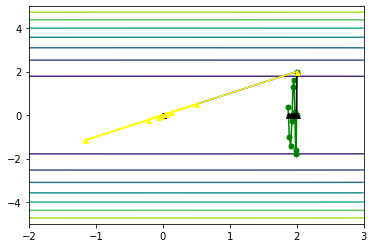

In [17]:
# Plot the contours of f and the history of the point estimates

xrange = np.linspace(-2,3)
yrange = np.linspace(-5,5)
X,Y = np.meshgrid(xrange, yrange)
Z = np.array([z for z in map(f, zip(X.flatten(), Y.flatten()))])
Z = Z.reshape(X.shape)
gdlines = mline.Line2D(gdxhist[:,0], gdxhist[:,1], color='red', marker='+', markersize=10)
hblines = mline.Line2D(hbxhist[:,0], hbxhist[:,1], color='green', marker='o', markersize=5)
naglines = mline.Line2D(nagxhist[:,0], nagxhist[:,1], color='black', marker='^', markersize=5)
aglines = mline.Line2D(agxhist[:,0], agxhist[:,1], color='blue', marker='^', markersize=5)
rmslines = mline.Line2D(rmsxhist[:,0], rmsxhist[:,1], color='yellow', marker='^', markersize=5)

fig, ax = plt.subplots()
ax.contour(X,Y,Z)
transform = ax.transAxes
#ax.add_line(gdlines)
ax.add_line(hblines)
ax.add_line(naglines)
ax.add_line(aglines)
ax.add_line(rmslines)
plt.show()

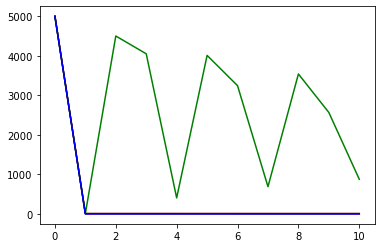

In [18]:
# Plot the size of the gradient vs iteration
gradnorm = lambda x: np.linalg.norm(df(x))
gdgradhist = np.apply_along_axis(gradnorm, 1, gdxhist)
hbgradhist = np.apply_along_axis(gradnorm, 1, hbxhist)
naggradhist = np.apply_along_axis(gradnorm, 1, nagxhist)
aggradhist = np.apply_along_axis(gradnorm, 1, agxhist)

plt.plot(gdgradhist, color = 'red')
plt.plot(hbgradhist, color = 'green')
plt.plot(naggradhist, color='black')
plt.plot(aggradhist, color='blue')

In [19]:
rmsxhist[-1]

array([0.0373527, 0.0373527])

In [20]:
agxhist[-1]

array([1.69403579e-101, 5.82682870e-157])